# Seaborn

Seaborn is great for the data exploration stage as we can make complex plots very easily and they also look great. This notebook contains various different plot types for your reference.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(color_codes=True) #overide matplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [13, 8] #default figure size

# Data

We'll work with one of the toy datasets to get familiar with the plotting.

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

# Boxplot


<Axes: ylabel='tip'>

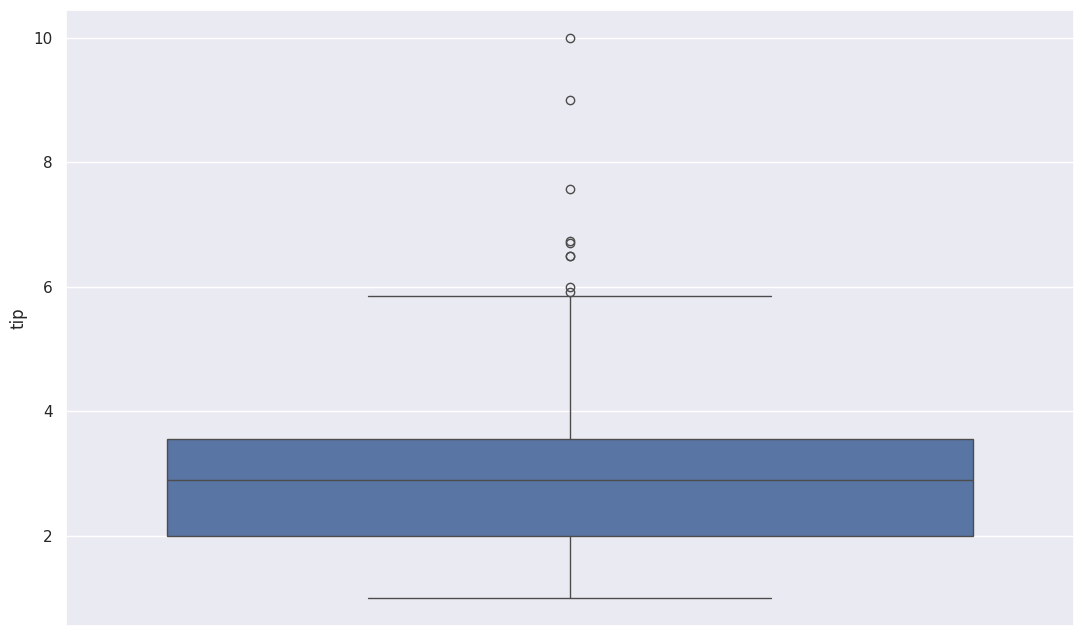

In [6]:
mpl.rcParams['figure.figsize'] = [13, 8]
sns.boxplot(df['tip'])

<Axes: xlabel='day', ylabel='tip'>

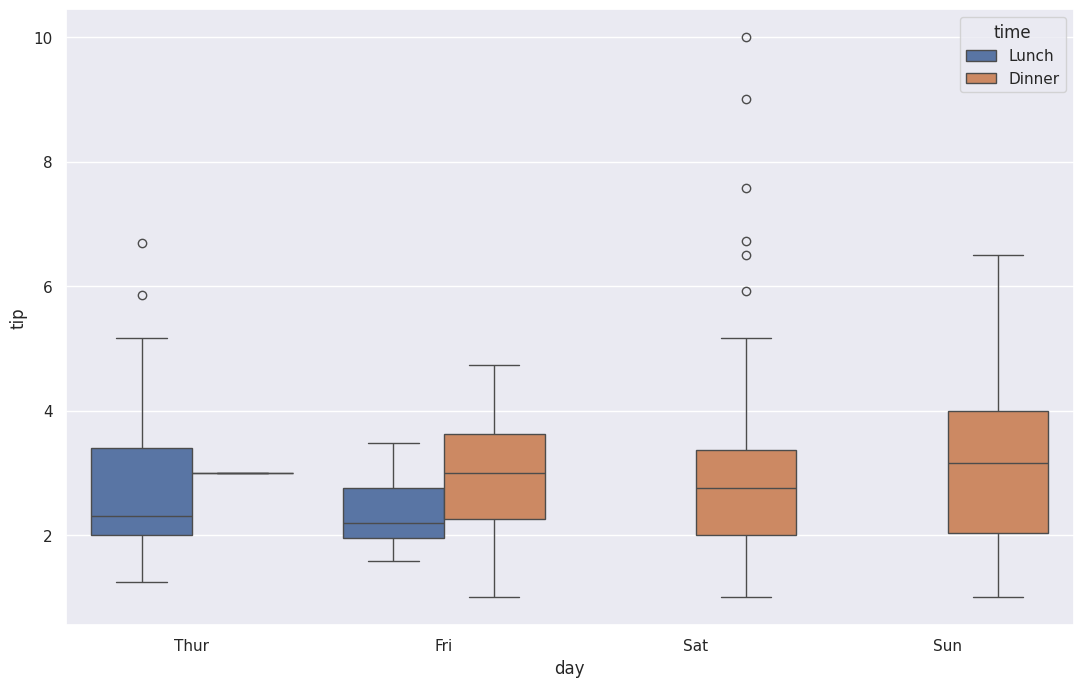

In [7]:
sns.boxplot(data = df,x="day",y="tip", hue="time")

Insights:
* Median for thursday is the lowest
* On saturday there are lots of outliers
* Sunday has the highest variance in tips

<Axes: xlabel='total_bill', ylabel='Density'>

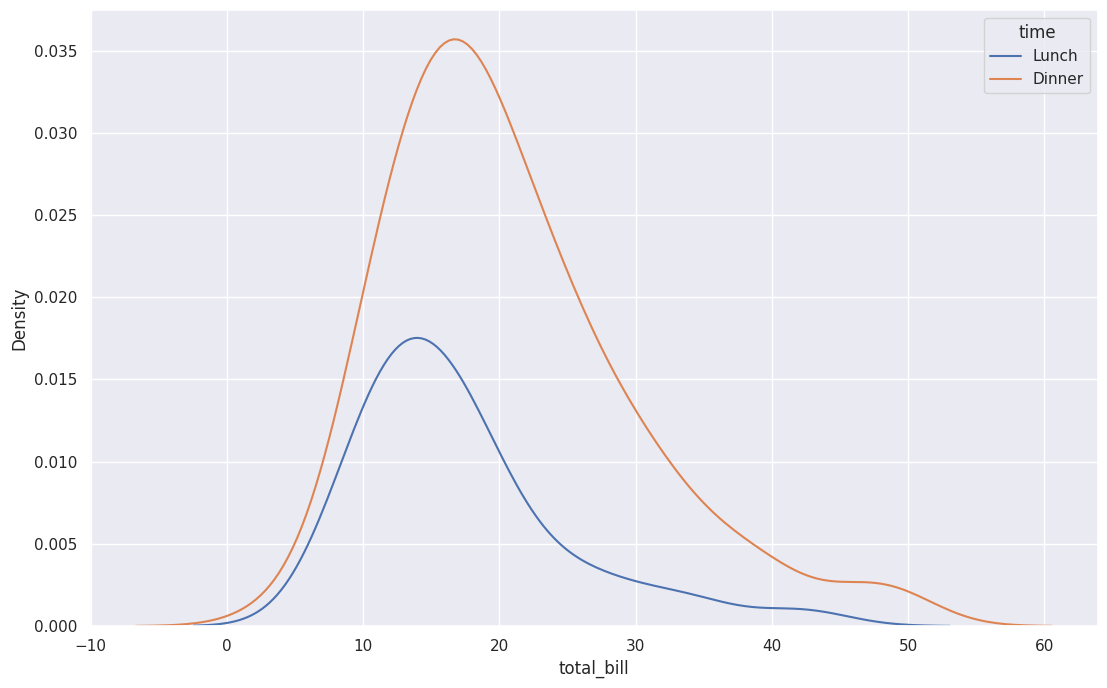

In [8]:
sns.kdeplot(data=df, x="total_bill", hue="time")
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
#analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more
#dimensions.

#If you are receiving an error report in running this code, it is probably an issue with the version of Seaborn
#you have installed. To solve this, launch Anaconda Navigator --> Spyder --> run the code,
#"pip install --upgrade seaborn". Then come back to your Jupyter Notebook, and click, Kernel --> Restart, and try
#running the code again.

In [9]:
type(df['total_bill'][0])

numpy.float64

# Distributions

<ipython-input-10-2adb8ec1fe7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_bill)


<Axes: xlabel='total_bill', ylabel='Density'>

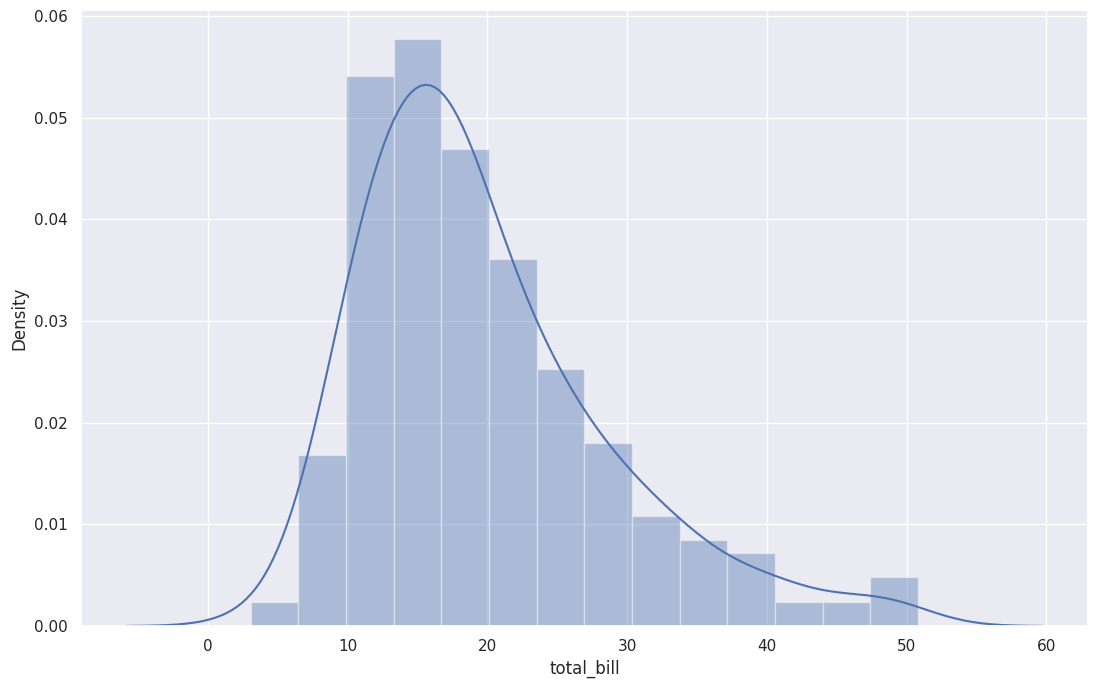

In [10]:
sns.distplot(df.total_bill)

* Not normally disributed, slightly skewed
* Mode is around 13
* Mean is around 19

In [11]:
df.total_bill.mean()

19.78594262295082

In [12]:
df.total_bill.mode()

0    13.42
Name: total_bill, dtype: float64

In [13]:
df.total_bill.median()

17.795

# Violin

Violin plots are great since we get two plots in one, they are essentially a combination of distribution and a boxplot.

Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data, and markers indicating the interquartile range.

<Axes: ylabel='total_bill'>

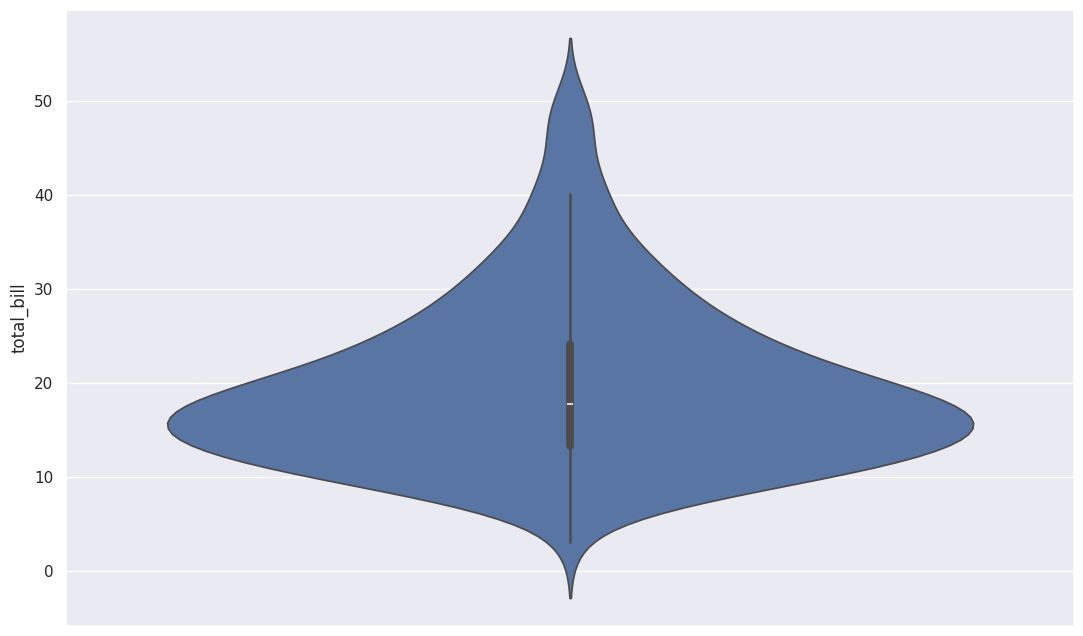

In [14]:
sns.violinplot(y =df.total_bill)

We can see that the data is well centered around the mean in the above plot.

<Axes: xlabel='day', ylabel='tip'>

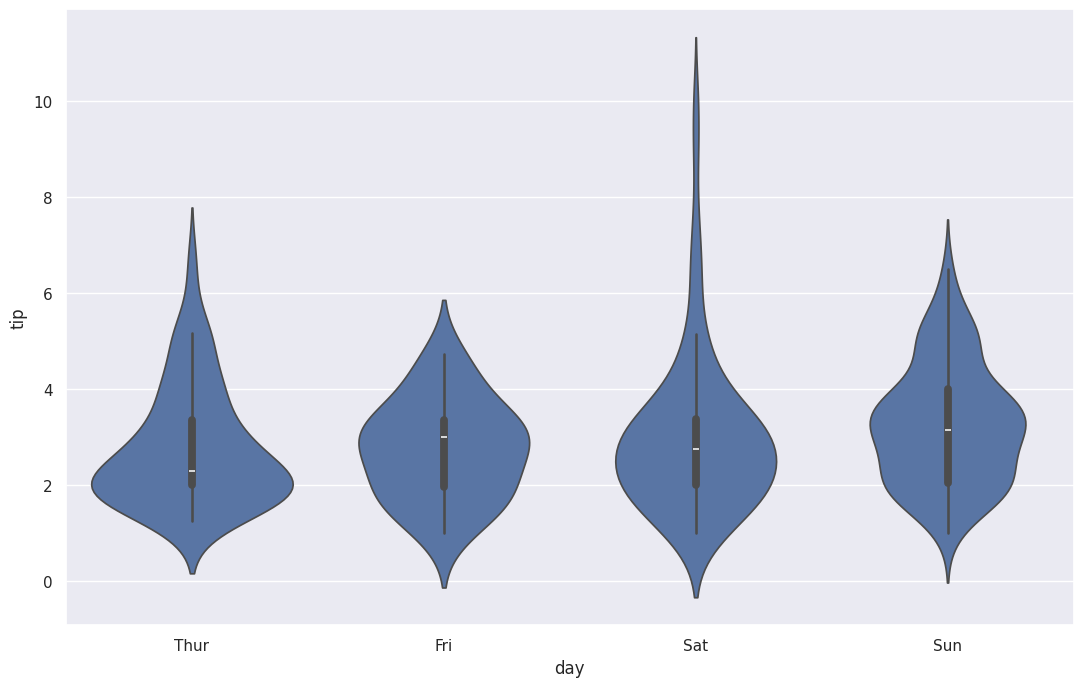

In [15]:
sns.violinplot(data=df,y='tip',x='day')

By comparing the violin plots for the 4 days, we can see that Thursday and Saturday have some outliers due to the longer tail in the plot.

# PairPlot

Can be used to quickly plot all numerical data in a pairwise manner. We get histograms on the diagonal and scatter plots on the off-diagonals.

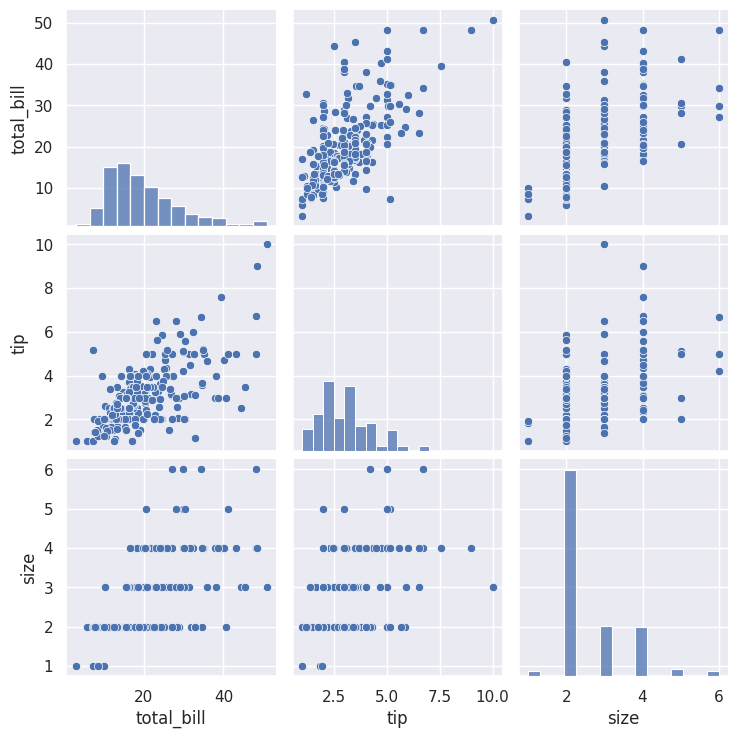

In [16]:
sns.pairplot(data=df)

# PairGrid

PairGrid provides us a convenient way to specify which type of plots we want on the grid.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

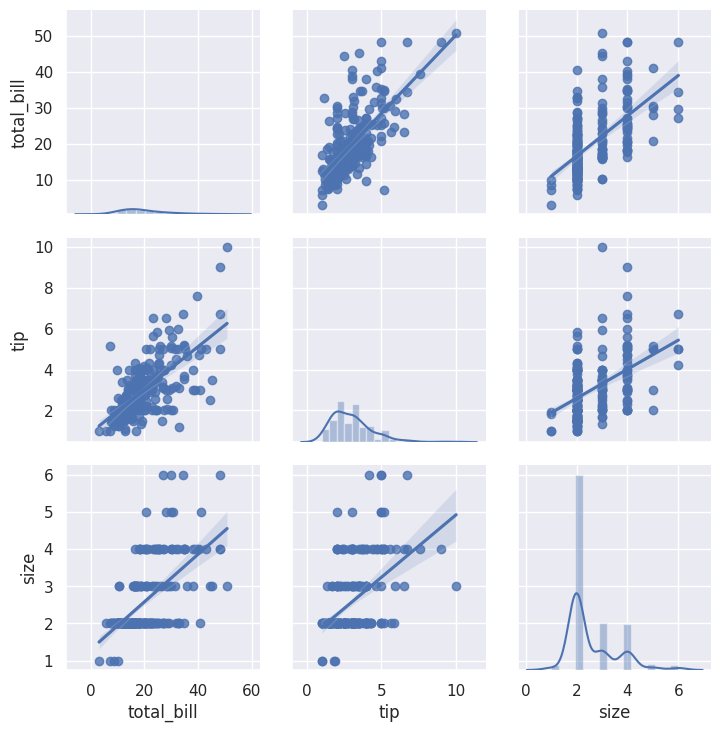

In [18]:
g = sns.PairGrid(df)
g.map_diag(sns.distplot)#Plotting the distribution
g.map_offdiag(sns.regplot) #Regression plot - plot data with linear regression model fit

# Bar

In [ ]:
sns.barplot(data=df, x = 'day',y ="total_bill", palette= "deep", hue="time")

The black bars indicate the standard deviation, or the area that we are  95% certain that the mean is within that black line. Although we can see that on Saturday and Sunday people spend the most on average, since the black error bars still overlap we can't statstically reject that their means are different.

# Heatmap

An easy way to look for correlated variables.

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Regression

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
p = sns.regplot(y = df.total_bill , x = df.tip)

In [ ]:
results = smf.ols('total_bill~tip ' , data = df).fit()

In [ ]:
results.summary()

The R-Square is only around 45%, so the simple linear regression is not a good fit.

# References

* [Seaborn API](https://seaborn.pydata.org/api.html)